### 🌟 Basic Idea
<pre>
A context manager handles the setup and cleanup for a block of code — commonly used with the with statement.

For example:

with open("file.txt", "r") as f:
    data = f.read()

Here:
    open() is the context manager.
    It opens the file and assigns it to f.
    When the with block ends, the file is automatically closed — even if an exception occurs.
</pre>

### ⚠️ Why Use Context Managers?
<pre>
    Prevent resource leaks
    Write cleaner code
    Handle exceptions safely
</pre>

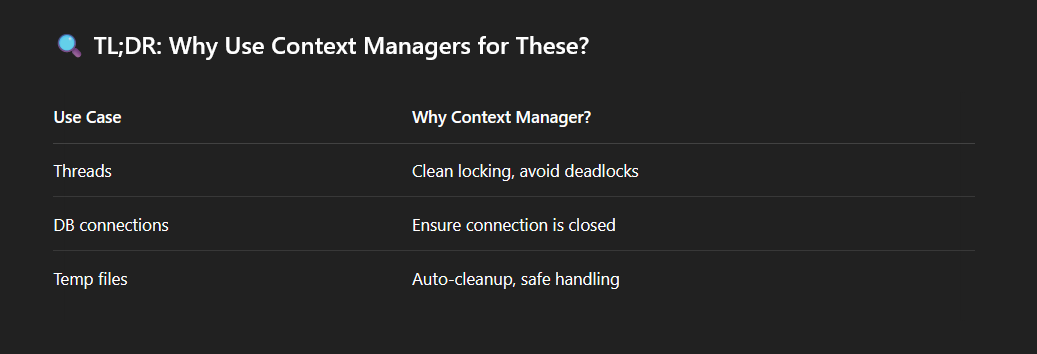

### 🛠️ Let's Build One Ourselves
<pre>
There are two main ways to create a context manager:
1. Using a Class (With __enter__ and __exit__)
2. Using a Generator + contextlib.contextmanager
</pre>

### 1. Using a Class (With __enter__ and __exit__)

In [2]:
class Mycontext:
    def __init__(self):
        print("Init is called...")

    def __enter__(self):
        print("Entering Context...")
        return "Custom Resources"
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print("Exiting context...")
        if exc_type:
            print(f"Exception occured: {exc_type.__name__} - {exc_val} \n {exc_tb}")
        
        return True
    
with Mycontext() as mc:
    print(f"resource: {mc}")
    raise ValueError("Not found")


Init is called...
Entering Context...
resource: Custom Resources
Exiting context...
Exception occured: ValueError - Not found 


In [5]:
class FileManager:
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
        self.f = None
    
    def __enter__(self):
        print("Enterted contex...")        
        self.f = open(self.filename, self.mode)
        return self.f
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print('Exiting context')
        if exc_type:
            print(f"Exception occured: {exc_type.__name__} - {exc_val} \n {exc_tb}")
        return self.f.close()
    
    # loading a file 
with FileManager('test.txt', 'w') as f:
    f.write('Test')
 
print(f.closed)

Enterted contex...
Exiting context
True


In [7]:
with FileManager('test1.txt', 'r') as f:
    print(f.read())
 
print(f.closed)

Enterted contex...


FileNotFoundError: [Errno 2] No such file or directory: 'test1.txt'

<pre>
custom context manager FileManager raises a FileNotFoundError before entering the context 
self.f = open(self.filename, self.mode)
is inside the __enter__() method.

If the file doesn't exist (and you're trying to open it in read mode 'r')
open() fails immediately, and Python never even reaches the __enter__() fully. 
That means __exit__() is never called, because the context wasn't successfully entered.
</pre>

### Locking with Threads

In [15]:
import threading

lock = threading.Lock()
val = 10
def counter():
    global val 
    with lock:   # lock is acquired here
        val += 1  # critical section
    # lock is released automatically here

# Clean and no need to call lock.acquire() or lock.release() manually.

t1 = threading.Thread(target=counter, name="mythread1")
t2 = threading.Thread(target=counter, name="mythread2")

t1.start()
t2.start()
t1.join()
t2.join()

print(val)

12


### 2. Using a Generator + contextlib.contextmanager

In [ ]:
from contextlib import contextmanager # decorator — For creating context managers using generator functions.

@contextmanager
def my_context():
    print("Entring context ...")
    yield "Resources"
    print("Exiting context")

with my_context() as mc:
    print(mc)

Entring context ...
Resources
Exiting context
